## Projekt zespołowy PRiAD

## "Grupowanie państw na podstawie wyglądu ich flag"

**Alesandra Kowalczyk, Artur Prasuła, Kacper Achramowicz**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.cluster import AgglomerativeClustering,KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

## 1. Analiza eksploracyjna zbioru danych

**Wczytanie i przygotowanie danych do dalszej analizy**

In [2]:
headers = ['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours', 'red',
           'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters',
           'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']
flags = pd.read_csv('flag.data', names = headers, index_col = 0)

colors = {'black': 1, 'blue': 2, 'brown': 3, 'gold': 4, 'green': 5, 'orange': 6, 'red': 7, 'white': 8}
flags['mainhue'] = flags['mainhue'].map(colors)
flags['topleft'] = flags['topleft'].map(colors)
flags['botright'] = flags['botright'].map(colors)

flags

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5,1,648,16,10,2,0,3,5,1,...,0,0,1,0,0,1,0,0,1,5
Albania,3,1,29,3,6,6,0,0,3,1,...,0,0,1,0,0,0,1,0,7,7
Algeria,4,1,2388,20,8,2,2,0,3,1,...,0,0,1,1,0,0,0,0,5,8
American-Samoa,6,3,0,0,1,1,0,0,5,1,...,0,0,0,0,1,1,1,0,2,7
Andorra,3,1,0,0,6,0,3,0,3,1,...,0,0,0,0,0,0,0,0,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western-Samoa,6,3,3,0,1,1,0,0,3,1,...,0,1,5,0,0,0,0,0,2,7
Yugoslavia,3,1,256,22,6,6,0,3,4,1,...,0,0,1,0,0,0,0,0,2,7
Zaire,4,2,905,28,10,5,0,0,4,1,...,0,0,0,0,0,1,1,0,5,5


In [3]:
missingTest = flags.isnull()
missingTest.all(axis='columns')
missingTest.any()

landmass      False
zone          False
area          False
population    False
language      False
religion      False
bars          False
stripes       False
colours       False
red           False
green         False
blue          False
gold          False
white         False
black         False
orange        False
mainhue       False
circles       False
crosses       False
saltires      False
quarters      False
sunstars      False
crescent      False
triangle      False
icon          False
animate       False
text          False
topleft       False
botright      False
dtype: bool

W naszym zestawie danych nie ma braków(co pokazują powyższe testy), więc nie trzeba ich uzupełniać.

**Analiza pojedynczych atrybutow**

In [22]:
flags.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
flags.mode()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,4,1,0,0,10,1,0,0,3,1,...,0,0,0,0,0,0,0,0,red,red


In [24]:
flags.mode().to_string()

'   landmass  zone  area  population  language  religion  bars  stripes  colours  red  green  blue  gold  white  black  orange  mainhue  circles  crosses  saltires  quarters  sunstars  crescent  triangle  icon  animate  text topleft botright\n0         4     1     0           0        10         1     0        0        3    1      0     1     0      1      0       0        7        0        0         0         0         0         0         0     0        0     0     red      red'

* większość krajów leży w Afryce
* większość krajów leży w strefie północno-wschodniej
* w większości krajów językiem urzędowym jest język z grupy określonej jako "inne"
* w większości krajów dominującym wyznanien jest odłam chrześcijaństwa niebędący katolicyzmem

* najwięcej flag nie posiada pionowych i poziomych kresek oraz ma trzy kolory
* większość flag zawiera kolor czerwony, niebieski oraz biały. Z drugiej strony kolory zielony, złoty, czarny oraz pomarańczowy występują w mniej niż połowie flag
* najczęstszym kolorem dominującym jest czerwony
* wszystkie bardziej specyficzne atrybuty(circles  crosses  saltires  quarters  sunstars  crescent  triangle  icon  animate  text) występują w mniej niż 50% flag
* kolorem najczęściej występującym w prawym górnym oraz lewym dolnym rogu jest czerwony

**Analiza zależności atrybutów i poznawanie zbioru danych**

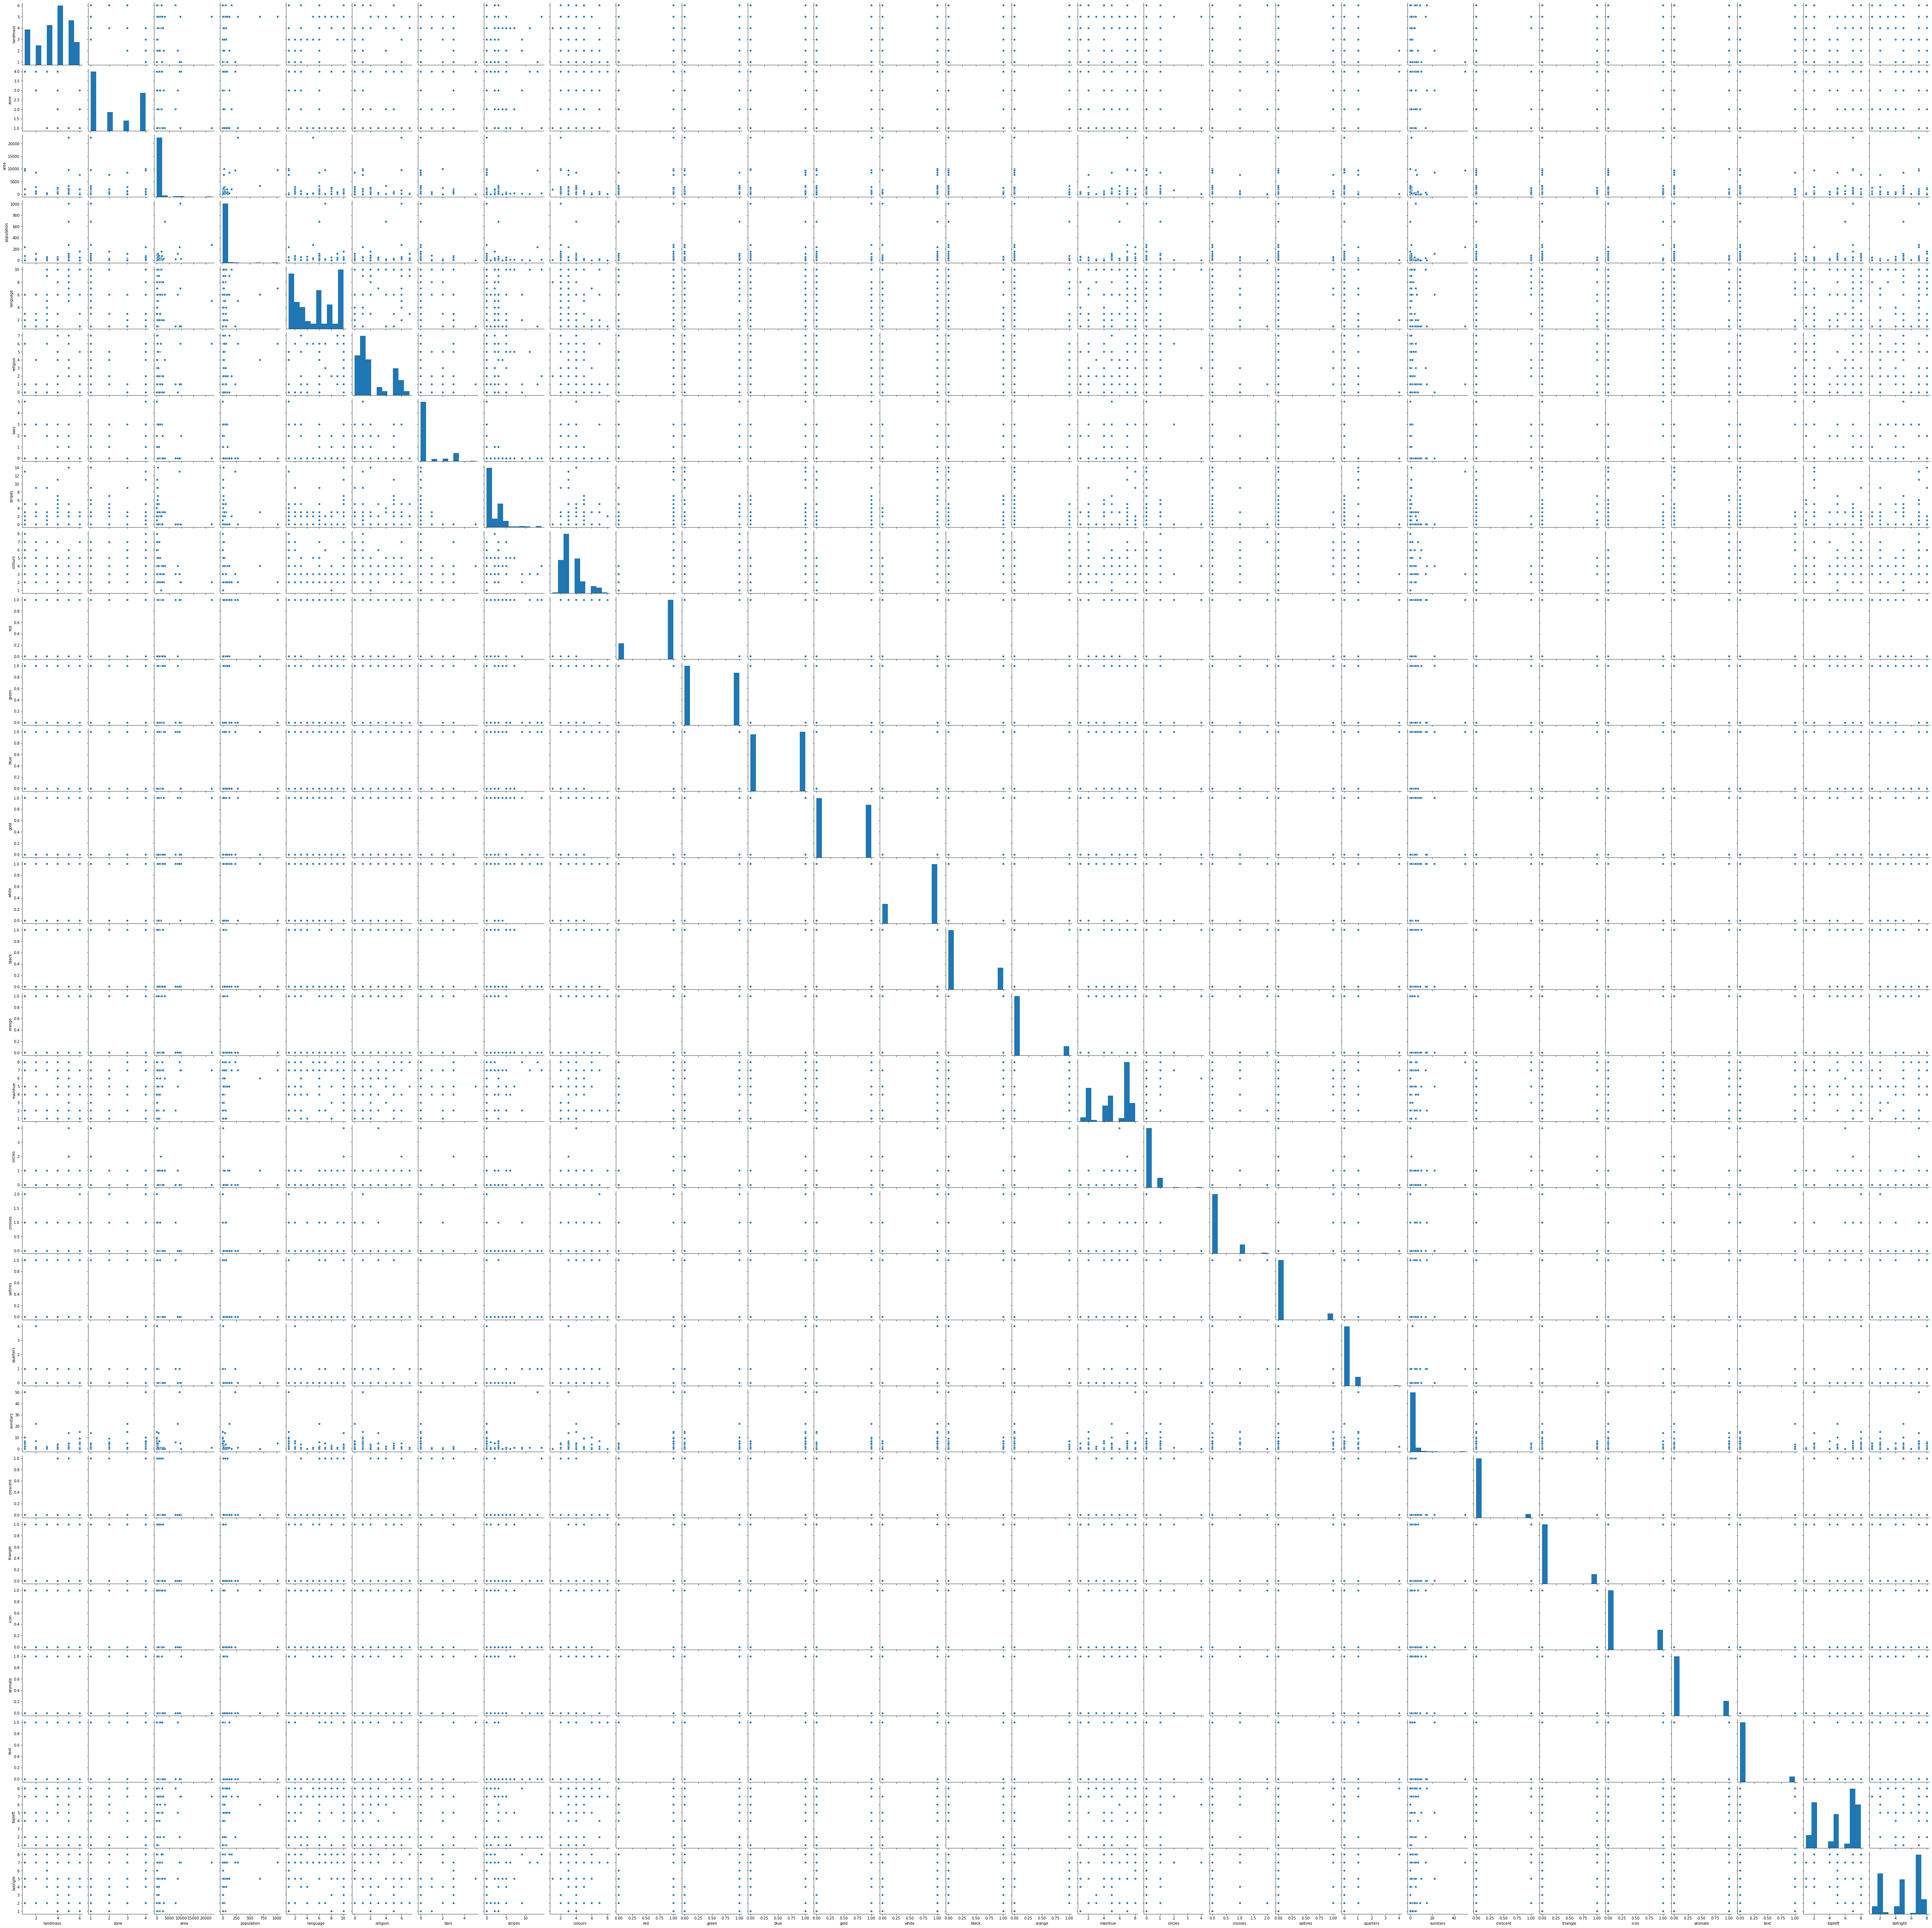

In [29]:
sns.pairplot(flags, kind="scatter")

**Wnioski z histogramów**

* najwięcej krajów znajduje się na kontynencie Afryki, następnie Azji, a potem Europy
* z histogramu atrybutu zone, możemy wywnioskować, że większość flag znajduje się z strefie NE 
* histogramy pokazują, że zdecydowana większość krajów, ma powierzchnię mniejszą niż 2500 tysięcy kilometrów
* histogram populacji pokazuje, że zdecydowana większość krajów ma populacje mniejszą niż 125 milionów
* histogram języków pokazuje, że najpopularniejszym językiem jest język angielski 
* z histogramu występowania koloru czerwonego możemy wnioskować, że ponad ¾ flag zawiera kolor czerwony
* z histogramu występować kolory zielonego, możemy wywnioskować, że prawie połowa flag zawiera ten kolor 
* z histogramu występować kolory niebieskiego, możemy wywnioskować, że ponad połowa flag zawiera ten kolor 
* z histogramu występować kolory złotego (też żółtego), możemy wywnioskować, że trochę prawie połowa flag zawiera ten kolor 
* z histogramu występowania koloru białego możemy wnioskować, że około ¾ flag zawiera kolor biały
* z histogramu występowania koloru czarnego możemy wnioskować, że około ¾ flag nie zawiera koloru czarnego
* z histogramu występowania koloru pomarańczowego (też brązowego) możemy wnioskować, że niewielka ilość flag zawiera ten kolor
* histogram bars i stripes pokazuje, że większość flag nie zawiera żadnych pionowych i poziomych słupków
* z histogramu atrybutu colours: najczęściej występują flagi z 3 kolorami
* z histogramu atrybutu: circles można wywnioskować, że zdecydowana większość flag ich nie zawiera; jeśli weźmiemy uwagę flagi, które zawierają, to najczęściej zawierają jedne, są też flagi z dwoma i czterema
* z histogramu atrybutu: upright crosses można wywnioskować, że zdecydowana większość flag nie zawiera ich, jeśli weźmiemy uwagę flagi, które zawierają, to najczęściej zawierają jeden, istnieją też flagi z dwoma
* z histogramu atrybutu: saltires (diagonal crosses) można wywnioskować, że zdecydowana większość flag nie zawiera ich, jeśli weźmiemy uwagę flagi, które zawierają, to najczęściej zawierają jeden
* z histogramu atrybutu: quartered sections można wywnioskować,że zdecydowana większość flag nie zawiera ich, jeśli weźmiemy uwagę flagi, które zawierają, to najczęściej zawierają jeden, są też flagi które zawierają cztery
* z histogramu atrybutu: sun or star symbols można wywnioskować, że zdecydowana większość flag nie zawiera ich, jeśli weźmiemy uwagę flagi, które zawierają, to większość flag zawiera te znaki w przedziale 1-10
* analizując histogramy atrybutów 24-28 możemy wywnioskować, że zdecydowana większość flag nie zawiera tych znaków, jeśli jednak weźmiemy pod uwagę flagi je zawierające, możemy przedstawić nastepujące relacje przedstawiające częstotliwość występowania tych atrybutów: icon > animate > triangle > text > crescent




**Wnioski z wykresów punktowych poszczególnych atrybutów**

* circles: najwięcej zawiera Azja (oprócz 0 1,2,4), natomiast reszta kontynentów 0 lub 1

* quartets: w Południowej Ameryce wystepuje flaga/flagi z 4, reszta to 0 lub 1

* sunstars: w Ameryce Północnej wystepuje flaga/flagi z 50 gwiazdami, reszta kontynentów zawiera mniej niż 25 gwiazd (na tym wykresie mamy przykład wartości nietypowej- 50 gwiazd, która jak wiemy dokładnie wskazuje na jedną flagę- flagę USA)

* ciekawym okryciem jest, że znak crescent występuje jedynie na flagach z kontynentu Afryki i Azji

* z wykresów punktowych atrybtów, z których jeden to język wnioskujemy, że:
* kraje z językiem niemieckim nie mają we fladze koloru zielonego ani pomarańczowego
* kraje z językiem japońskim, tureckim, fińskim i węgierskim nie mają we fladze koloru złotego, pomarańczowego, czarnego trójkątów, tekstu, animacji, ikon we fladze
* wszystkie kraje z językiem japońskim, tureckim, fińskim i węgierskim mają kolor biały we fladze
* kraje z językiem słowiańskim, chińskim i innymi(wartość: inne języki) nie mają czarnego ani pomarańczowego

* z wykresów punktowych atrybtów, z których jeden to religia wnioskujemy, że:
* wszystkie kraje z religią markśistowską mają kolor czerwony
* wszystkie 'inne religie' mają biały kolor we fladze, ale nie mają pomarańczowego
* wszystkie kraje z religią hinduizmu i 'inną' nie mają tekstu ani animacji we fladze
* crescent we fladze mają kraje z religią muzułmańską, buddyjską, hinduską i marksistowską

* z wykresów punktowych atrybtów, z których jeden to colours(ilość kolorów występujących we fladze) wnioskujemy, że wszystkie flagi,które mają największą ilość kolorów zawierają kolor czerwony, niebieski, złoty i biały


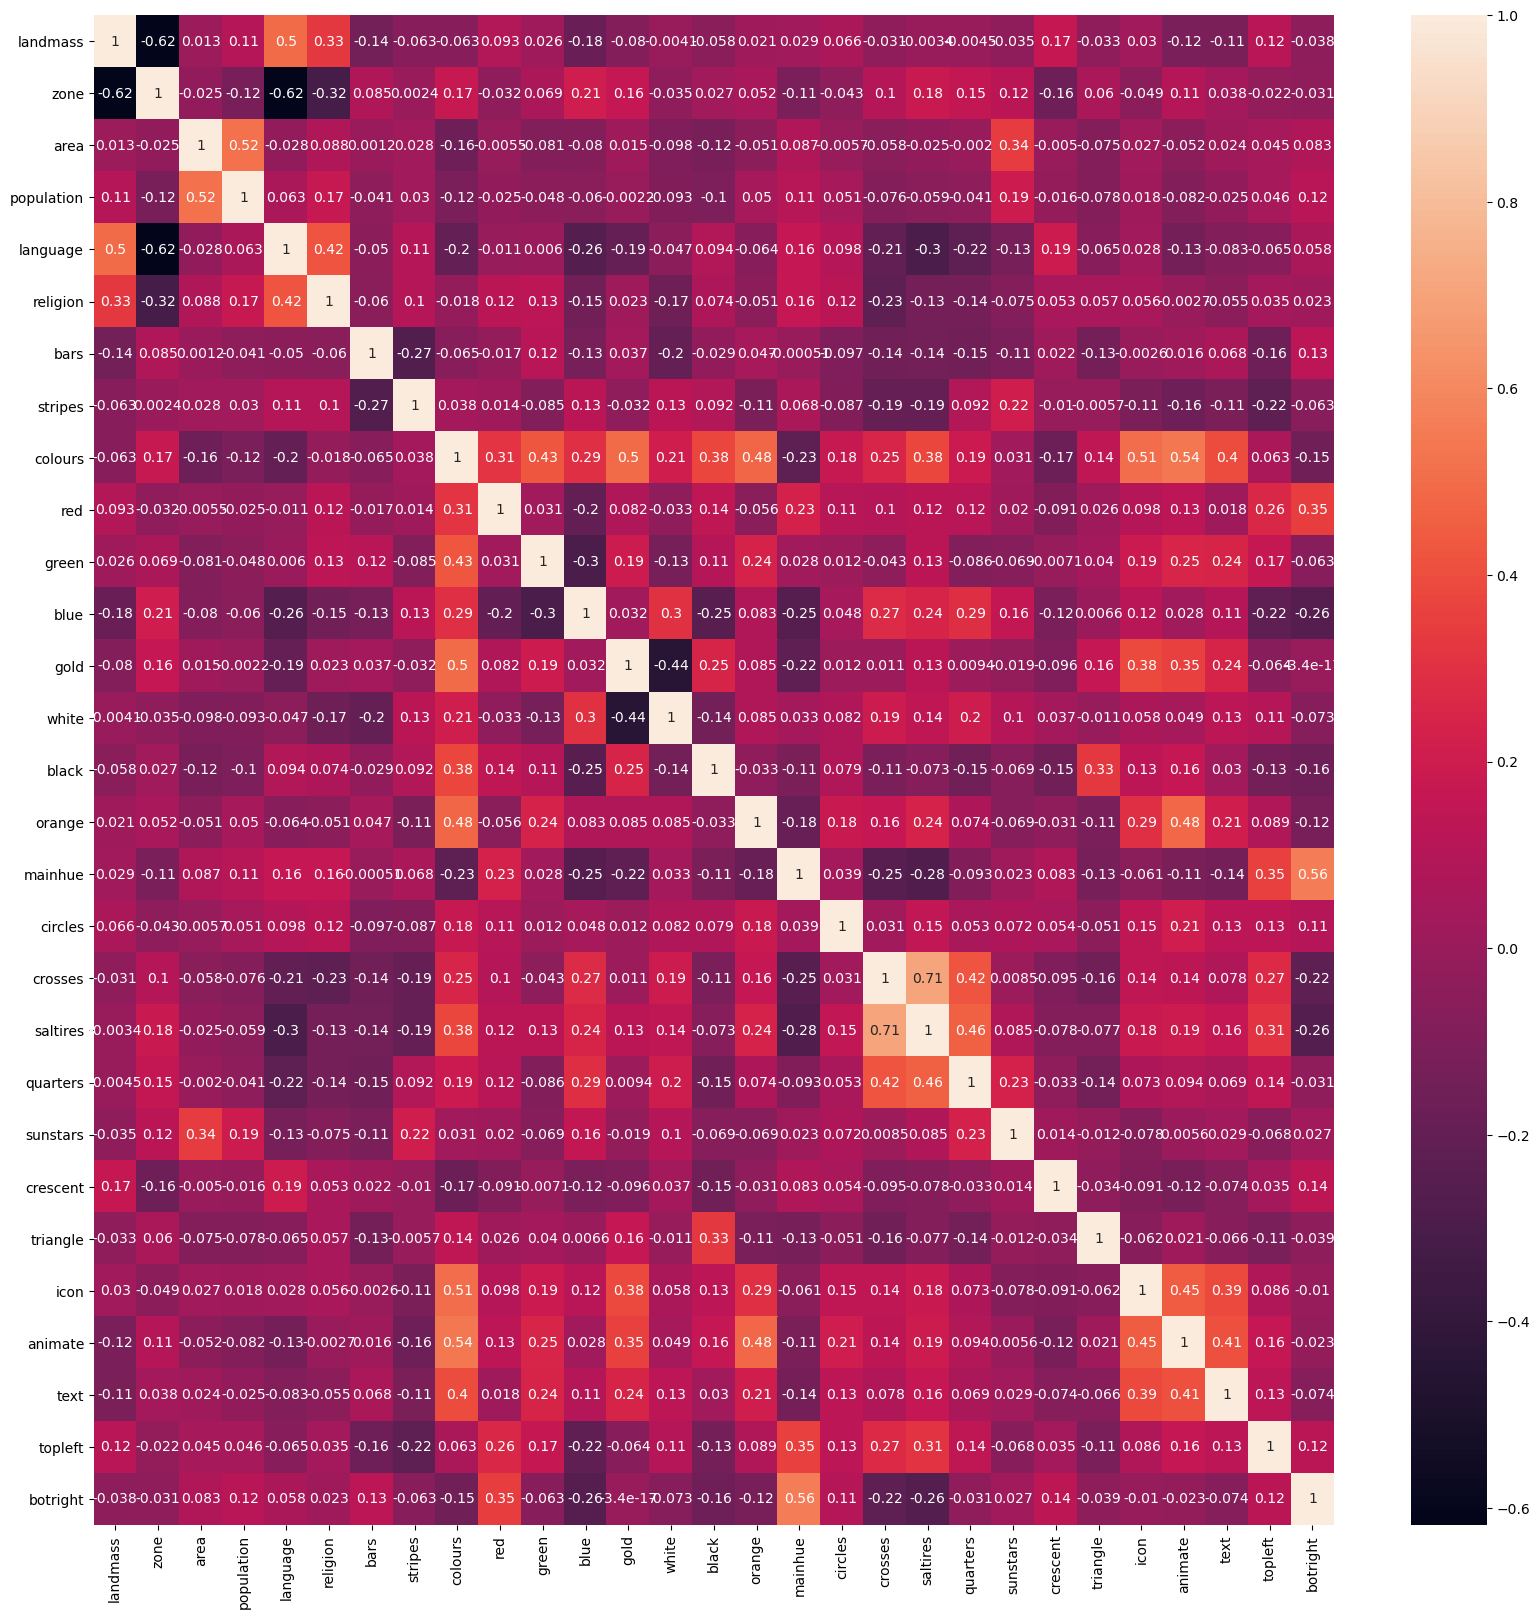

In [28]:
plt.figure(figsize=(20,20),dpi = 100)
sns.heatmap(flags.corr(),annot = flags.corr())

**Wnioski z macierzy korelacji**

* związek między landmass a zone wynosi (|-0.62| korelacja wysoka- zależność znaczna) 
* związek między landmass a language wynosi (0.5 – korelacja umiarkowana- zależność istotna)
* związek między landmass a religion wynosi (0.33 korelacja niska- zależność wyraźna)
* związek między zone a language wynosi (|-0.62| korelacja wysoka- zależność znaczna) 
* związek między zone a religion wynosi (-0.32 korelacja niska- zależność wyraźna)
* związek między population a area wynosi (0.52 – korelacja umiarkowana- zależność istotna) 
* związek między religion a language wynosi (0.42 – korelacja umiarkowana- zależność istotna) 
* istnieje związek między atrybutem “colours” a atrubutem “icon” (0.51 – korelacja umiarkowana- zależność istotna) “animate” (0.54– korelacja umiarkowana- zależność istotna) “text” (0.4 – korelacja umiarkowana- zależność istotna), czyli obecność ikon/animacji/tekstu zwiększa prawdopodobieństwa, że flaga składa się z wielu kolorów
* związek między colours a gold 0.5 – im więcej kolorów w mapie, tym większe prawdopodobieństwo, że wystąpi tam właśnie złoty (żółty)
* związek między colours a orange 0.48 – im więcej kolorów w mapie, tym większe prawdopodobieństwo, że wystąpi tam właśnie pomarańczowy
* związek między colours a  green 0.43 – im więcej kolorów w mapie, tym większe prawdopodobieństwo, że wystąpi tam właśnie zielony
* związek między colours a black 0.38 – im więcej kolorów w mapie, tym większe prawdopodobieństwo, że wystąpi tam właśnie czarny
* jeśli zaś chodzi o kolory: red (0.31) , blue(0.29), white (0.21), to nie ma tutaj aż takiego silnego związku ze zwiększeniem ilości kolorów we fladze- warto zauważyć, że te 3 kolory to właśnie 3 najczęściej występujące kolory we flagach- co uzasadnia, dlaczego nie istnieje tu silna korelacja między ich występowaniem a atrybutem colours
* związek między green a blue (-0.3 korelacja niska- zależność wyraźna), czyli im większa częstotliwość występowania jednego koloru, tym mniejsze prawdopodobieństwo wystąpienia drugiego
* związek między blue a white  (0.3 korelacja niska- zależność wyraźna), czyli im większa częstotliwość występowania jednego koloru, tym większe prawdopodobieństwo wystąpienia drugiego
* związek między gold a white (-0.44 korelacja umiarkowana- zależność istotna), czyli im większa częstotliwość występowania jednego koloru, tym mniejsze prawdopodobieństwo wystąpienia drugiego
* związek między black a triangle (0.33 korelacja niska- zależność wyraźna), czyli możemy dostrzec związek między występowaniem koloru czarnego, a występowaniem trójkątów we fladze
* związek między orange a animate white (0.48 korelacja umiarkowana- zależność istotna), czyli możemy dostrzec związek między występowaniem koloru pomarańczowego( i brązowego), a występowaniem animacji we fladze
* związek między crosses a saltires (0.71 korelacja wysoka- zależność znaczna)
* związek między crosses a quarters (-0.42 korelacja umiarkowana- zależność istotna),
* związek między saltires a quarters (-0.42 korelacja umiarkowana- zależność istotna),
* związek między icon a animate (0.45 korelacja umiarkowana- zależność istotna), icon a text (0.39 korelacja niska- zależność wyraźna)
* związek między animate a text (0.41 korelacja umiarkowana- zależność istotna)
* związek między botright a mainhue (0.56 korelacja umiarkowana- zależność istotna)
* związek między botright a red (0.35 korelacja niska- zależność wyraźna)
* związek między topleft a mainhue (0.35 korelacja niska- zależność wyraźna) 
* związek między topleft a saltires (0.31 korelacja niska- zależność wyraźna) - jest to najprawdopodobniej przypadkowa zależność

**Wykres pokazujący zależność atrybutów: mainhue, stripes**

Text(0, 0.5, 'stripes')

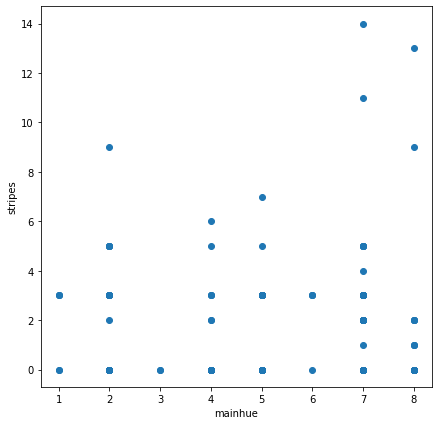

In [3]:
plt.figure(figsize = (7, 7))
plt.scatter(flags.mainhue, flags.stripes)
plt.xlabel('mainhue')
plt.ylabel('stripes')

## 2. Grupowanie zbioru danych

## 2.1. Grupowanie metodą k-srednich i analiza wyników

<ipython-input-4-94ac9bad30c4>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  miara_jakosci = pd.Series()


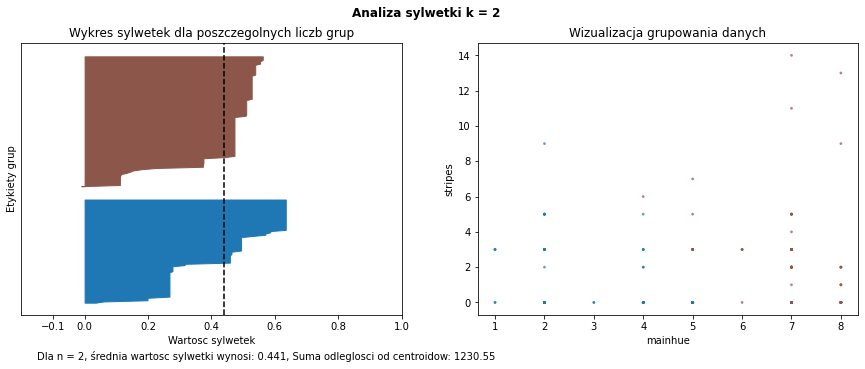

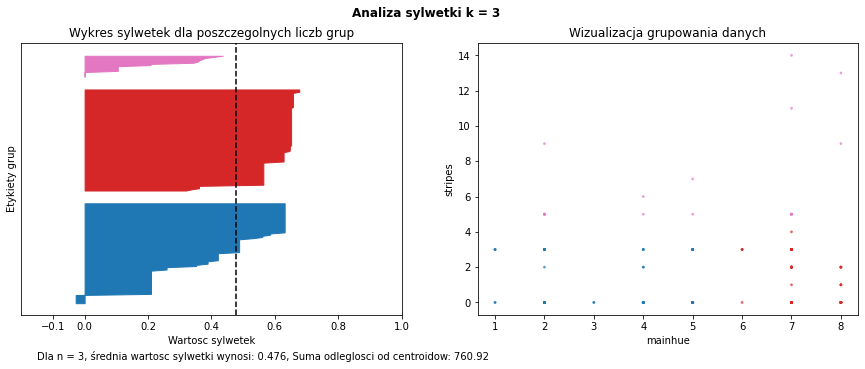

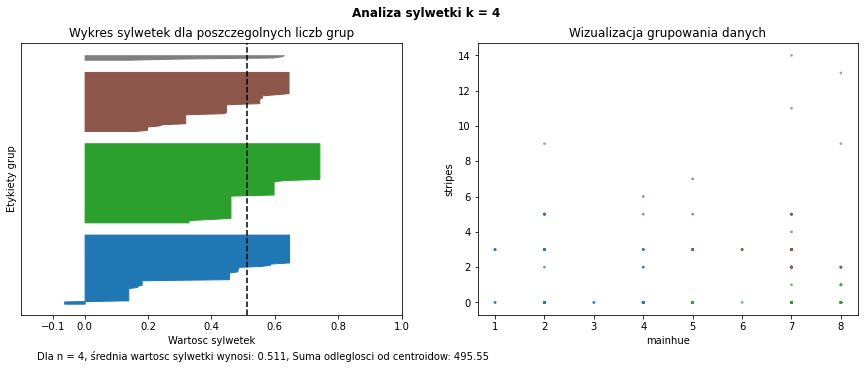

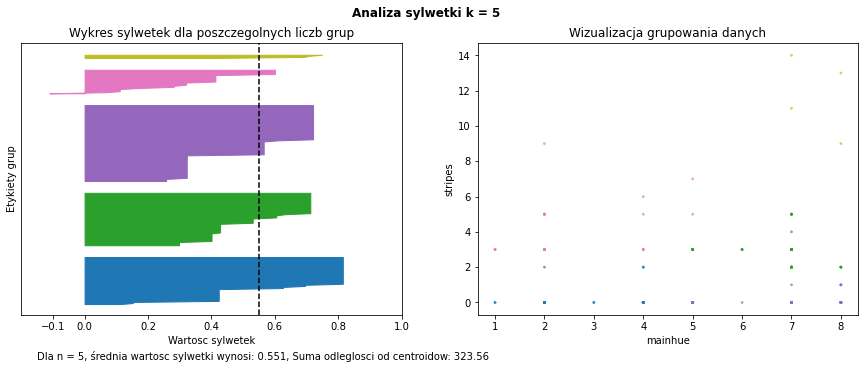

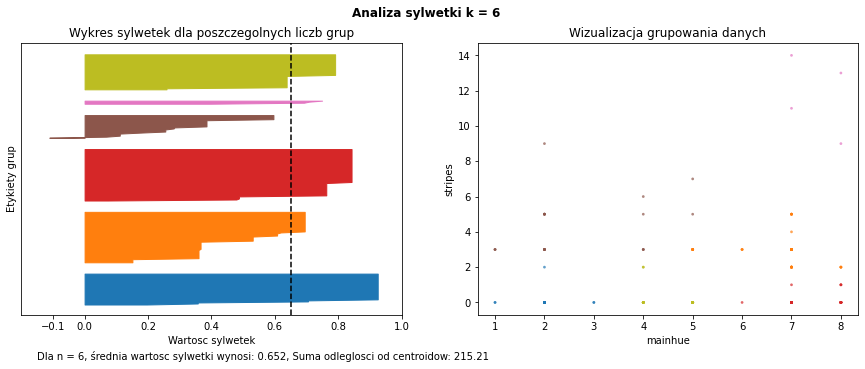

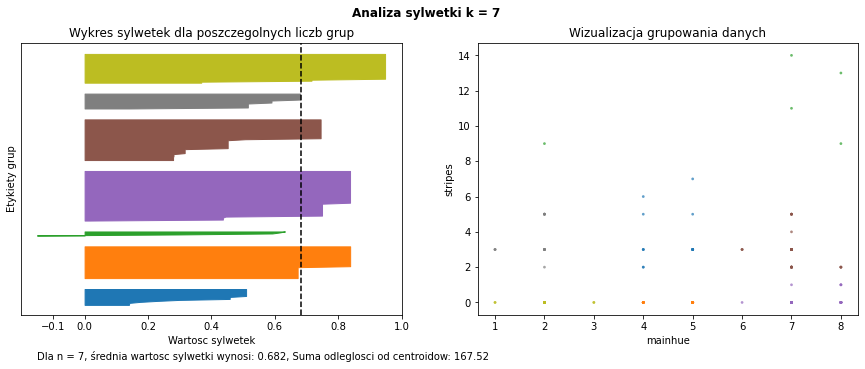

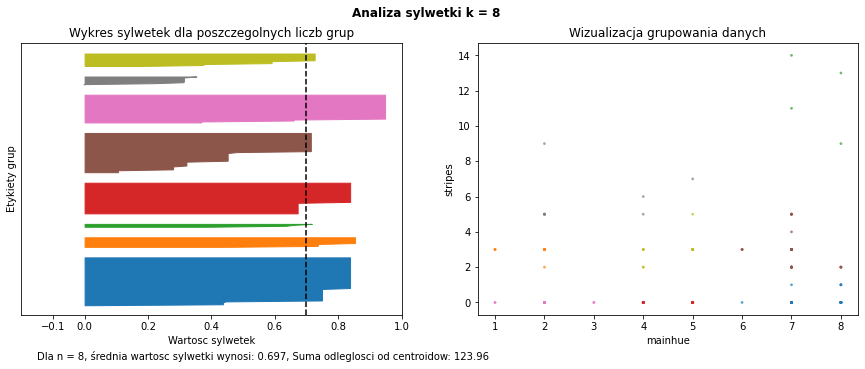

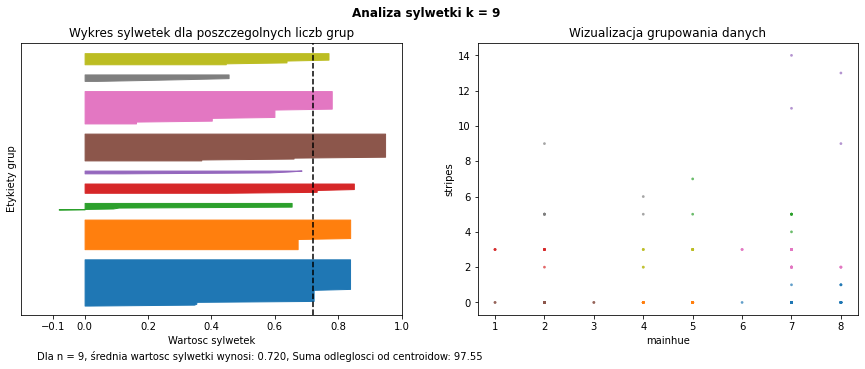

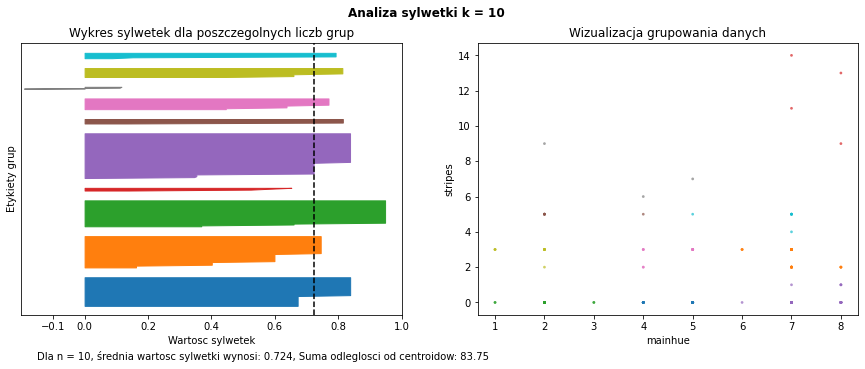

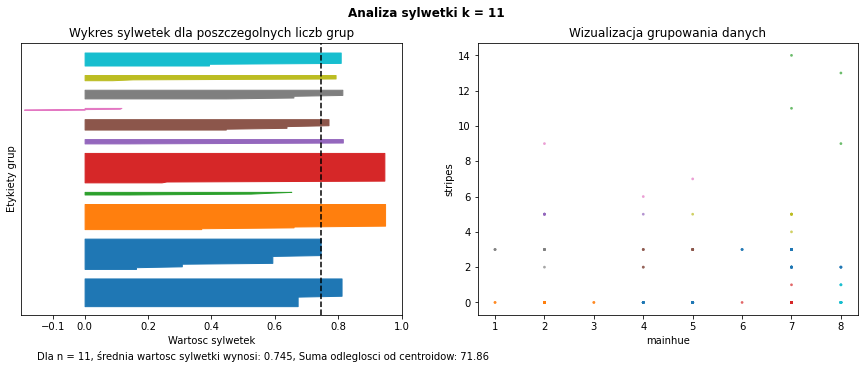

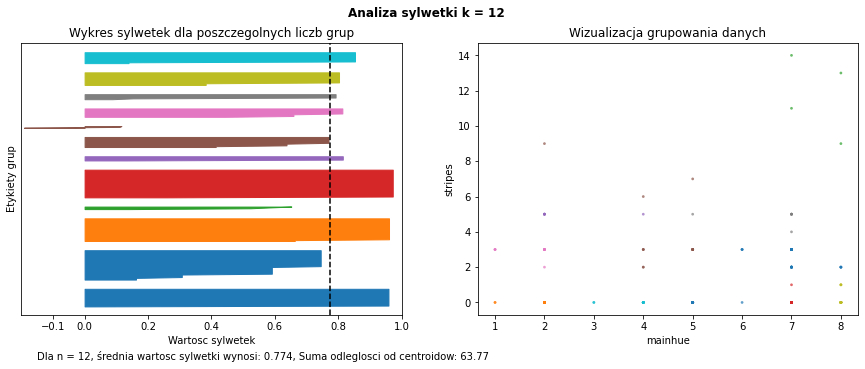

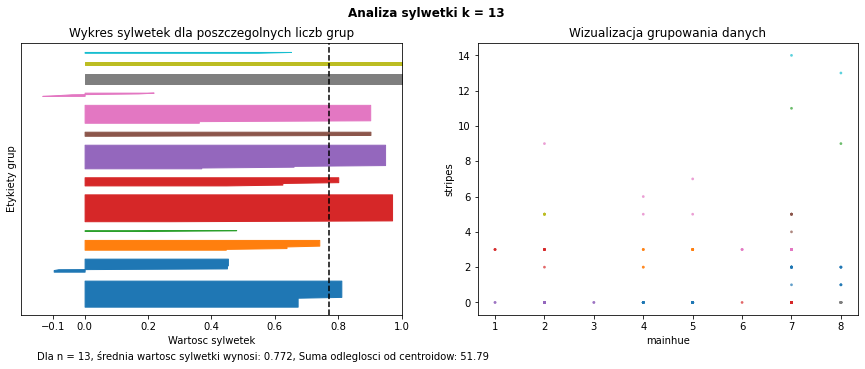

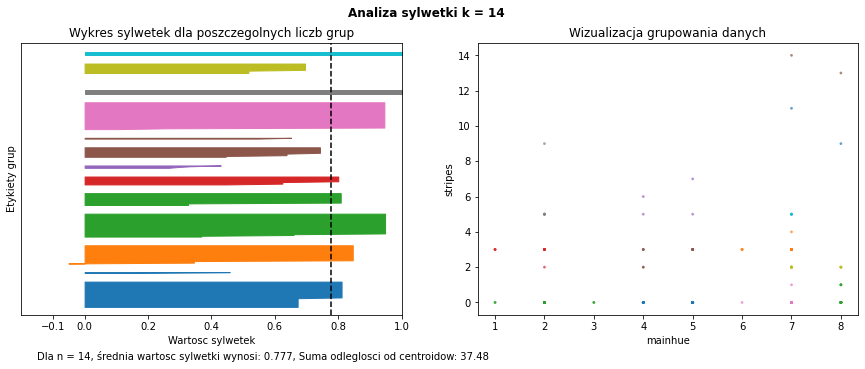

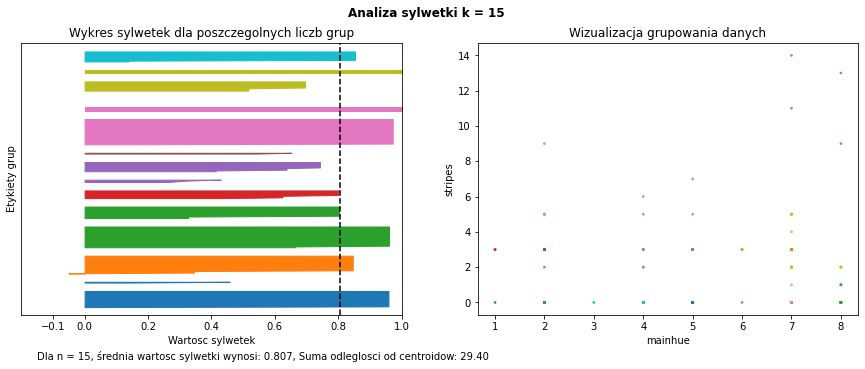

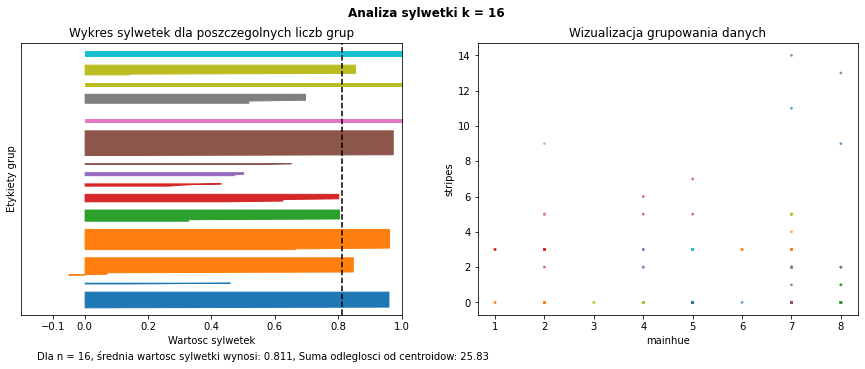

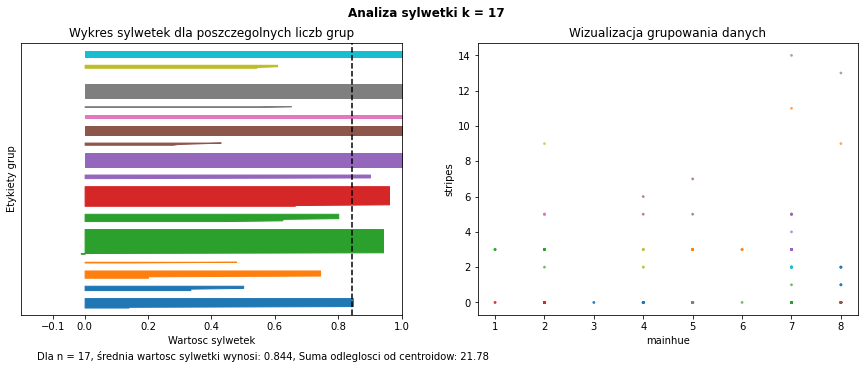

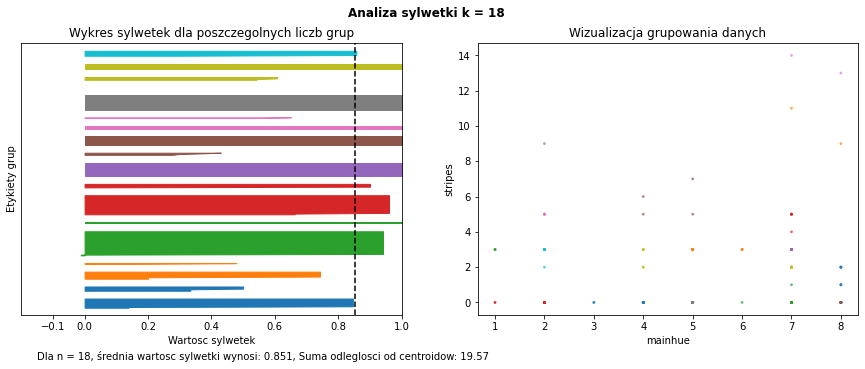

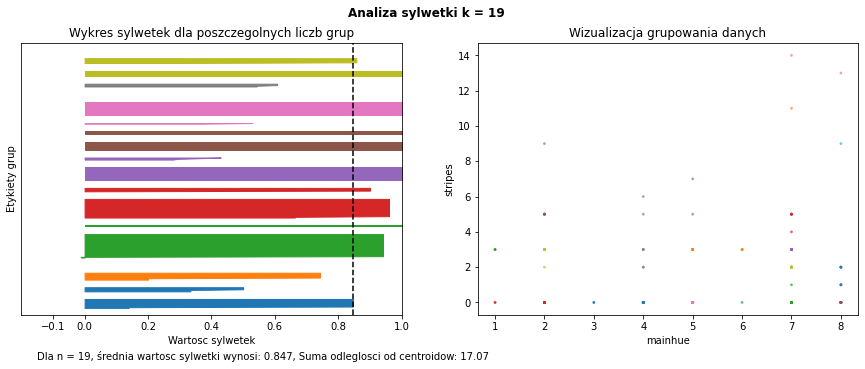

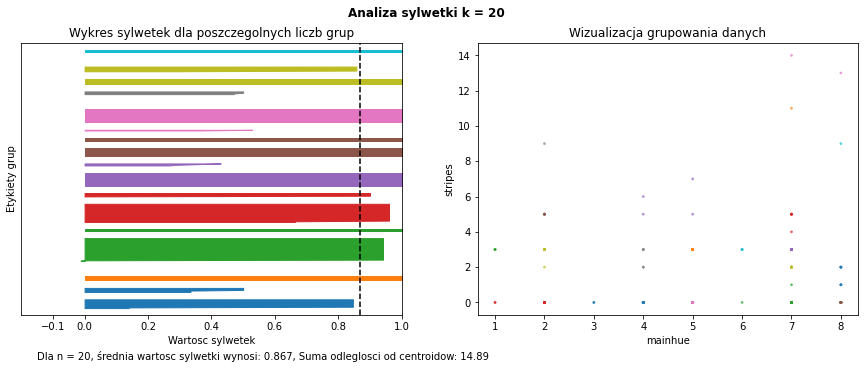

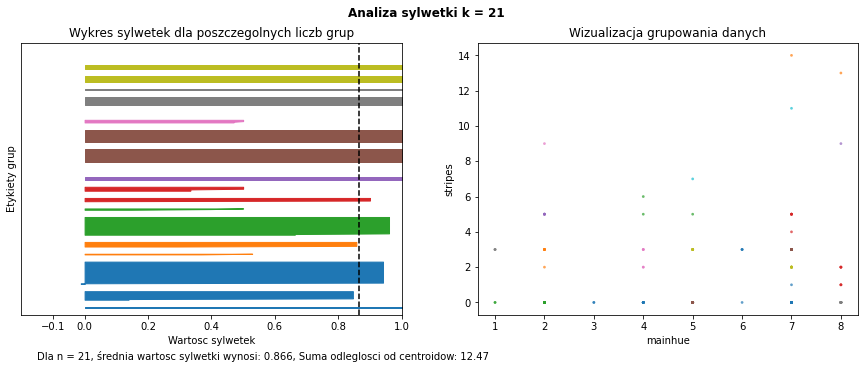

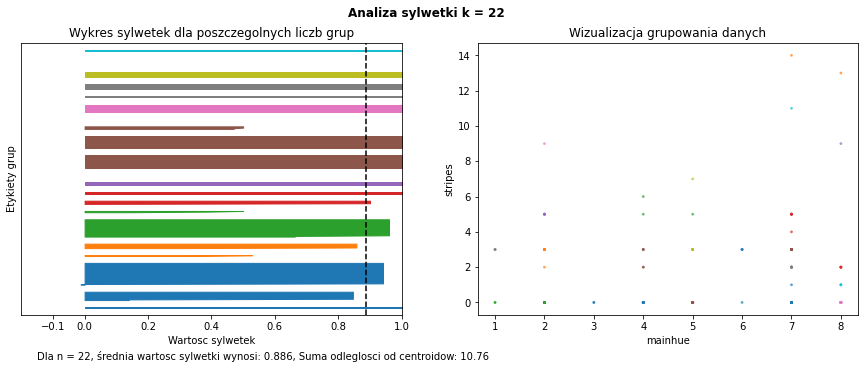

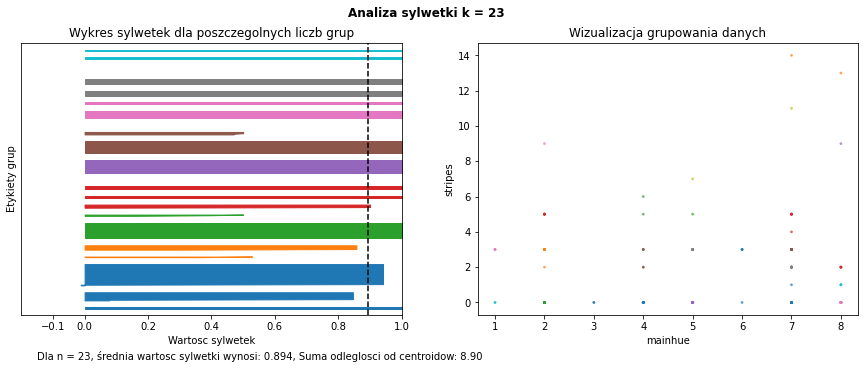

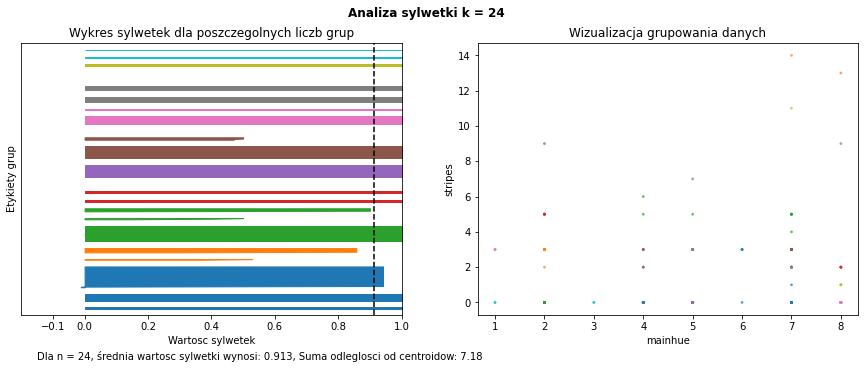

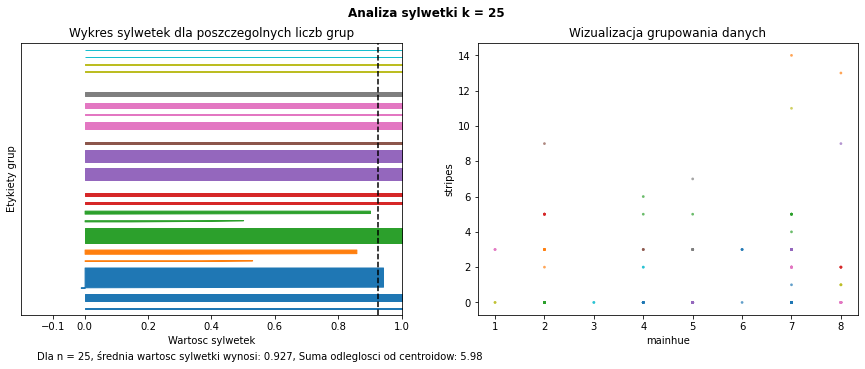

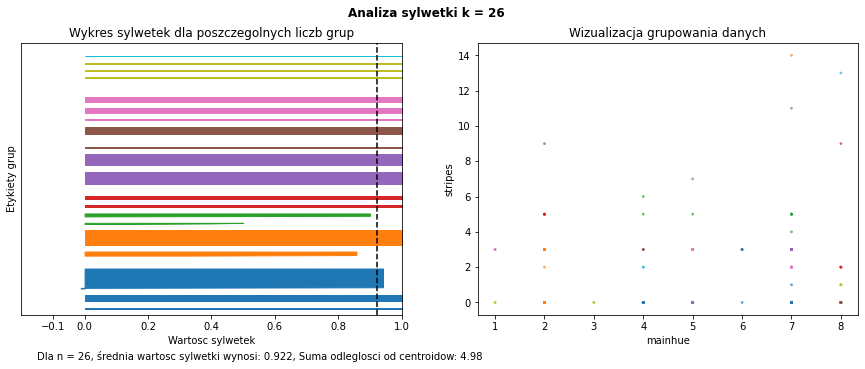

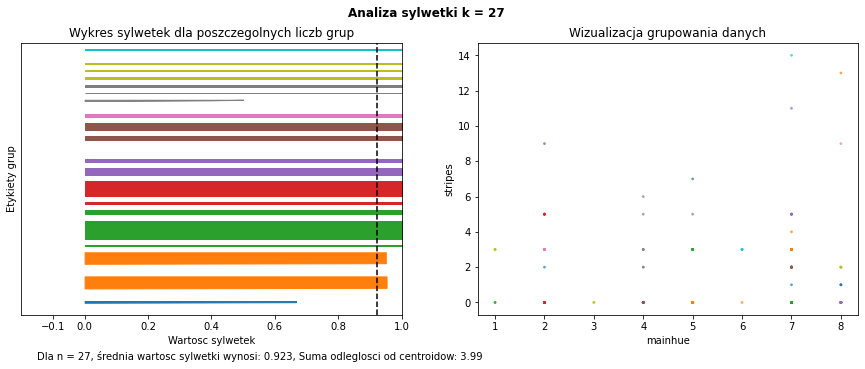

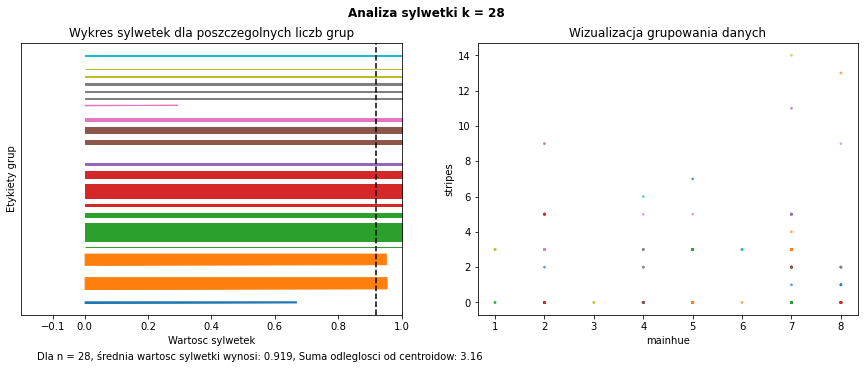

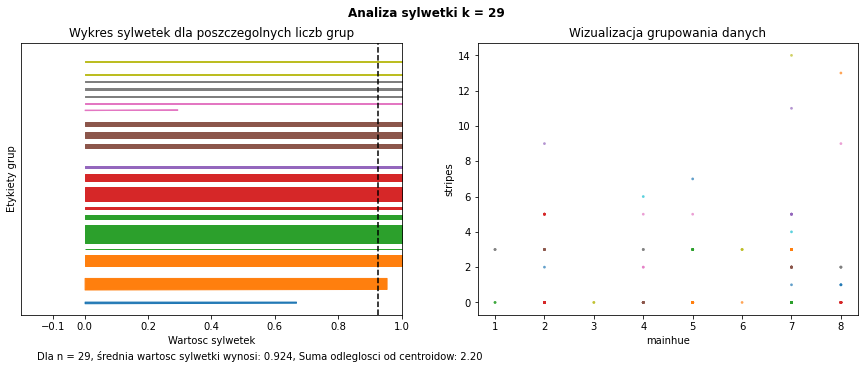

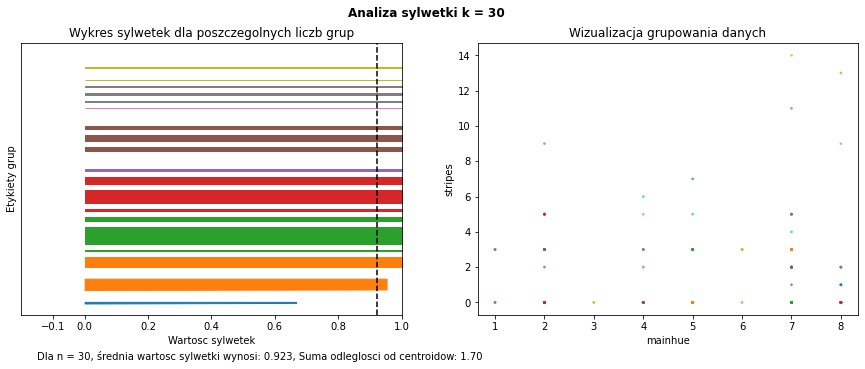

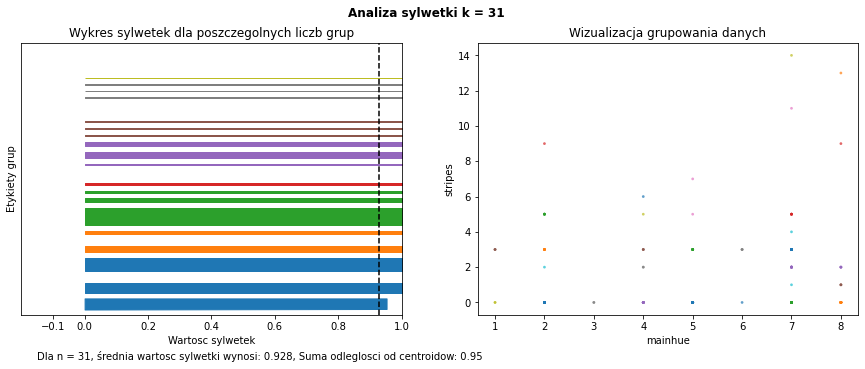

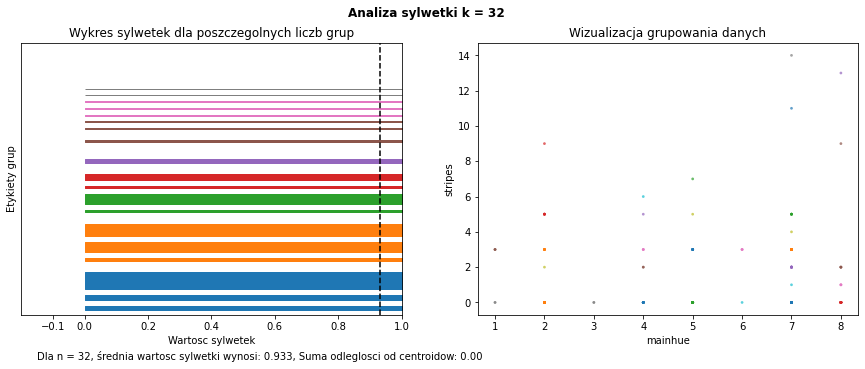

Text(0, 0.5, 'Suma odleglosci od centroidow')

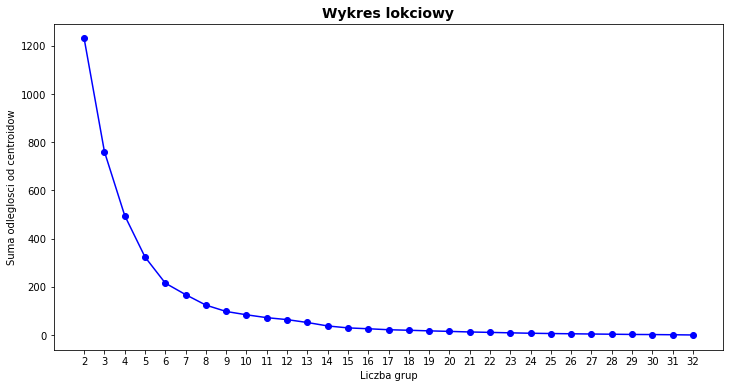

In [4]:
liczby_grup = range(2, 33)
miara_jakosci = pd.Series()
flags_kmeans = flags[['mainhue', 'stripes']]
group_labels_list = [np.nan, np.nan]
kmeans_list = [np.nan, np.nan]

for ile_grup in liczby_grup :
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)

    ax1.set_xlim([-0.2, 1]) 
    ax1.set_ylim([0, len(flags_kmeans) + (ile_grup + 1) * 10]) 
    
    kmeans = KMeans(n_clusters = ile_grup, random_state = 0).fit(flags_kmeans)
    miara_jakosci = miara_jakosci.append(pd.Series(kmeans.inertia_))
    etykiety_grup = kmeans.fit_predict(flags_kmeans[['mainhue','stripes']])
    group_labels_list.append(etykiety_grup)
    kmeans_list.append(kmeans)
 
    sylwetka = silhouette_samples(flags_kmeans[['mainhue','stripes']], etykiety_grup)   
    srednia_sylwetka = silhouette_score(flags_kmeans[['mainhue','stripes']], etykiety_grup)
    
    pozycja_kreski = 10
    for i in range(ile_grup):
        sylwetka_w_grupie = sylwetka[etykiety_grup == i]
        sylwetka_w_grupie.sort()

        liczebnosc_grupy = sylwetka_w_grupie.shape[0]
        kolor = cm.tab10(float(i) / ile_grup)
        ax1.fill_betweenx(np.arange(pozycja_kreski, pozycja_kreski + liczebnosc_grupy), 0, sylwetka_w_grupie ,color = kolor)

        pozycja_kreski += liczebnosc_grupy + 10 
        
    ax1.set_title("Wykres sylwetek dla poszczegolnych liczb grup")
    ax1.set_xlabel("Wartosc sylwetek")
    ax1.set_ylabel("Etykiety grup")
 
    ax1.axvline(x = srednia_sylwetka, color = "black", linestyle = "--")
    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    kolory = cm.tab10(etykiety_grup.astype(float) / ile_grup)
    ax2.scatter(flags_kmeans.mainhue, flags_kmeans.stripes, marker = '.', s = 30, lw = 0, alpha = 0.7,c = kolory)

    ax2.set_title("Wizualizacja grupowania danych")
    ax2.set_xlabel("mainhue")
    ax2.set_ylabel("stripes")

    plt.suptitle(("Analiza sylwetki k = %d" % ile_grup),  fontweight = 'bold')
    plt.figtext(0.14, 0, ("Dla n = %d, średnia wartosc sylwetki wynosi: %.3f, Suma odleglosci od centroidow: %.2f"
                 % (ile_grup, srednia_sylwetka, kmeans.inertia_ ) ))
    plt.show()
    
plt.figure(figsize = (12,6))
plt.plot(liczby_grup, miara_jakosci,'bo-')
plt.title("Wykres lokciowy", fontsize = 14, fontweight = 'bold')
plt.xticks(liczby_grup)
plt.xlabel("Liczba grup")
plt.ylabel("Suma odleglosci od centroidow")

In [6]:
number_of_groups = 10
group_number = 10
lb = group_labels_list[number_of_groups]
flags['group'] = lb + 1
flags[flags['group'] == group_number]

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright,group
name,,,,,,,,,,,,,,,,,,,,,
Gambia,4,4,10,1,1,5,0,5,4,1,...,0,0,0,0,0,0,0,7,5,10
Kenya,4,1,583,17,10,5,0,5,4,1,...,0,0,0,0,1,0,0,1,5,10
Mauritius,4,2,2,1,1,4,0,4,4,1,...,0,0,0,0,0,0,0,7,5,10
Puerto-Rico,1,4,9,3,2,0,0,5,3,1,...,0,1,0,1,0,0,0,7,7,10
Surinam,2,4,63,0,6,1,0,5,4,1,...,0,1,0,0,0,0,0,5,5,10
Thailand,5,1,514,49,10,3,0,5,3,1,...,0,0,0,0,0,0,0,7,7,10
Togo,4,1,57,2,3,7,0,5,4,1,...,1,1,0,0,0,0,0,7,5,10


**Wnioski o ilości grup**
* Z wykresu łokciowego wynika, że optymalna liczba grup mieści się w przedziale = <6-12>
* Z analizy sylwetki wynika, że optymalna liczba grup mieści się w przedziale = {5} u <10-12>(ale żadna ilość grup nie pasuje idealnie)
* Z obu tych analiz można stwierdzić, że optymalna ilość grup mieści się w przedziale <10-12>, a najlepszą ilością jest 10 grup.

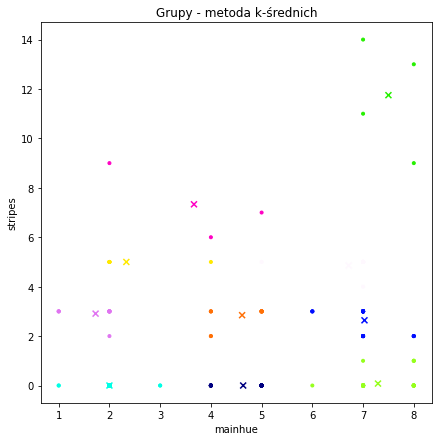

In [5]:
number_of_groups = 10
lb = group_labels_list[number_of_groups]
flags['group'] = lb + 1

plt.figure(figsize = (7, 7))
plt.scatter(flags.mainhue, flags.stripes, marker = '.', c = flags.group, cmap = 'gist_ncar')
plt.title('Grupy - metoda k-średnich')
plt.xlabel('mainhue')
plt.ylabel('stripes')
centroidy = kmeans_list[number_of_groups].cluster_centers_
plt.scatter(centroidy[:,0], centroidy[:,1], marker = 'x', c = np.array(range(number_of_groups)), cmap = 'gist_ncar')

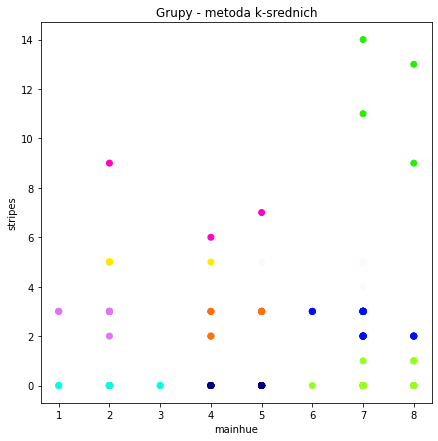

In [7]:
number_of_groups = 10
lb = group_labels_list[number_of_groups]
flags['group'] = lb + 1

plt.figure(figsize = (7, 7))
plt.scatter(flags.mainhue, flags.stripes, c = flags.group, cmap = 'gist_ncar')
plt.title('Grupy - metoda k-srednich')
plt.xlabel('mainhue')
plt.ylabel('stripes')

flags = flags.drop(['group'], axis = 1)

## 2.2. Hierarchiczne grupowanie aglomeraycjne i analiza wyników

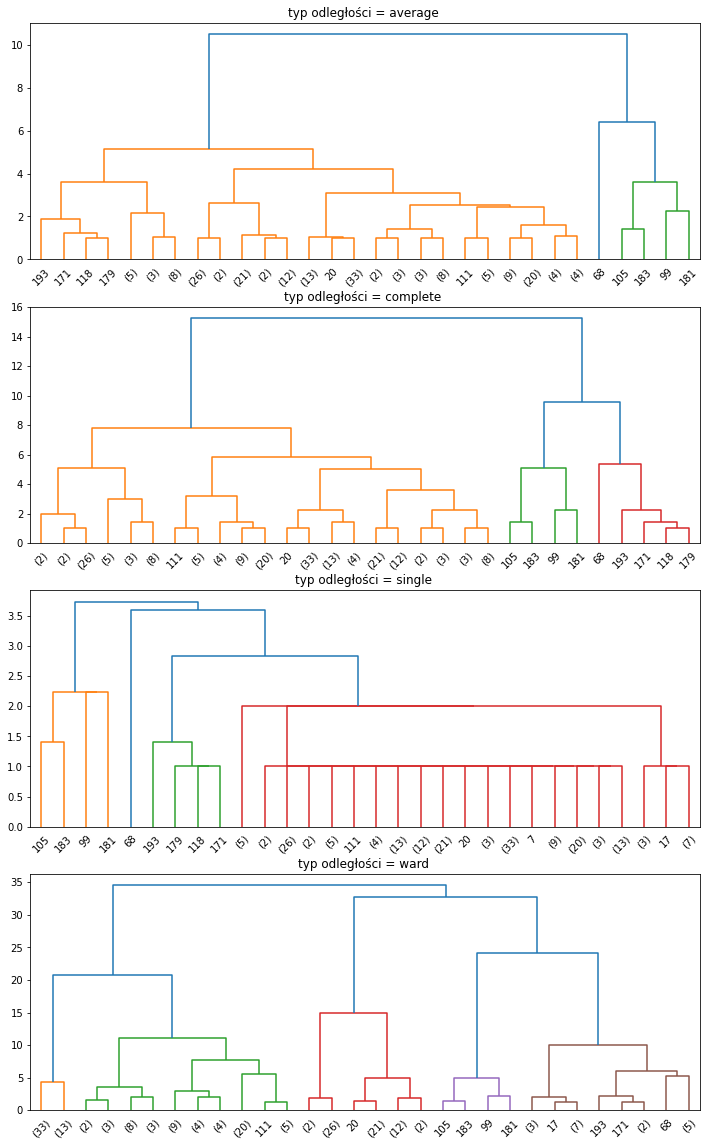

In [8]:
df = flags.drop(columns = ['landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'colours', 'red',
           'green', 'blue', 'gold', 'white', 'black', 'orange', 'circles', 'crosses', 'saltires', 'quarters',
           'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright'])

plt.figure(figsize=(12, 20))
for index, typ_odleglosci in enumerate(('average', 'complete', 'single', 'ward')):
        wy = plt.subplot(4, 1, index + 1)
        wy.set_title('typ odległości = %s ' % typ_odleglosci)
        grupy = linkage(df, method = typ_odleglosci, metric = 'euclidean')
        prog_proc = 60
        prog = prog_proc*max(grupy[:,2])/100
        cl = dendrogram(grupy, truncate_mode = 'lastp', color_threshold = prog )
        df['grupa'] = fcluster(grupy, prog, criterion = 'distance')

**Wnioski z dendrogramów stworzonych dla różnych odległości międzygrupowych:**
* single - na samym początku wykluczyliśmy ten sposób, ponieważ był on dla naszych danych nieprzydatny. Bardzo mocno uśredniał wyniki ( połączył większość różnych skupisk obiektów w jedną grupę), co spowodowało, że wynikiem grupowania było kilka bardzo licznych grup, gdzie dana grupa zawierała obiekty znacząco różniące się od siebie- ten sposób nie odpowiadałby efektom, jakie chceilibyśmy uzyskać

* average - następnie odrzuciliśmy ten sposób, ponieważ wyniki dendogramu były dla nas zbyt uśredniające,zbyt wiele obiektów zostało potraktowanych jako podobne i umieszczone w jednej grupie, a także grupy które tworzył, nie spełniały całkowicie naszych oczekiwań.

* ward - ten sposób tworzył podobną liczbę grup co complate, na który się zdecydowaliśmy. Jednak inaczej grupował pewne obiekty ( mimo podobnej liczebności grup co w sposobie complete, były to grupy, które zawierały inne obiekty). Jednak zawartość tych grup wydała nam się lepsza w metodzie complete, niż w ward, ponieważ tutaj łączone w jedną grupę były obiekty z atrybutami, które 'wizualnie' nie były podobne

* complete- sposób na który się zdecydowaliśmy. Tak jak opisywaliśmy daje on podobną liczbę grup co ward i podobny wygląd dendrogramu, jednak sposób w jaki grupował obiekty wydał się nam najbardziej odpowiedni. 

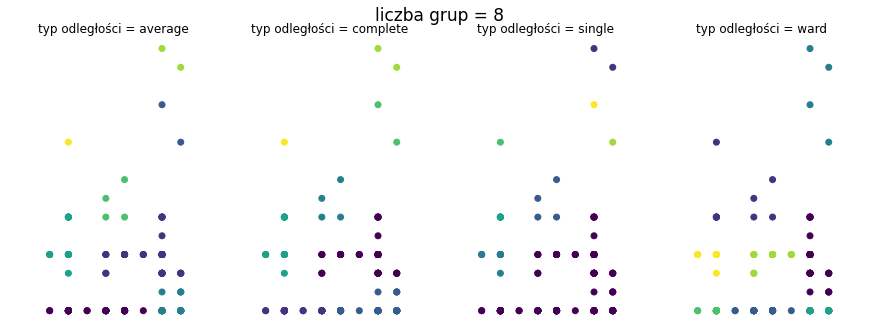

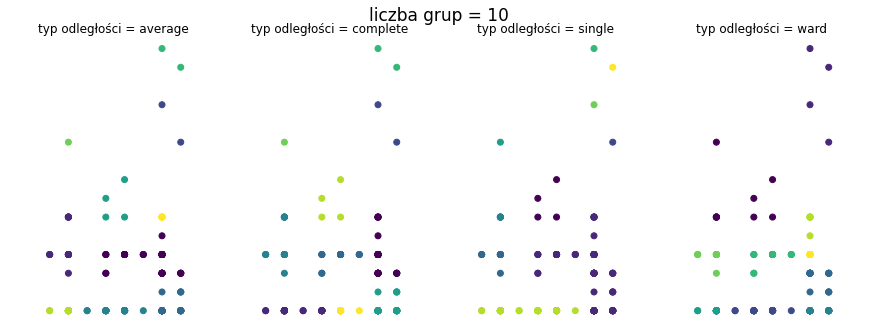

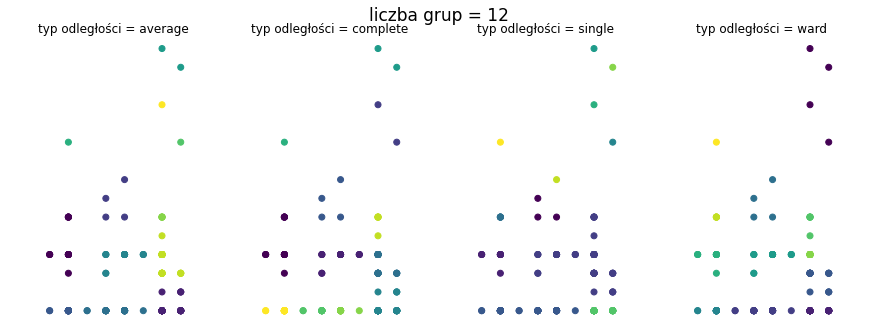

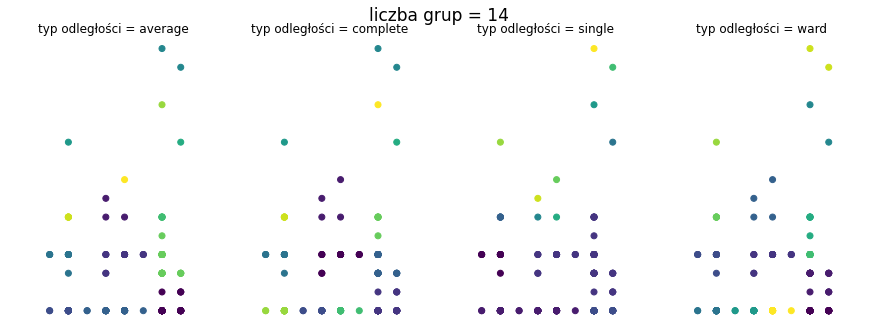

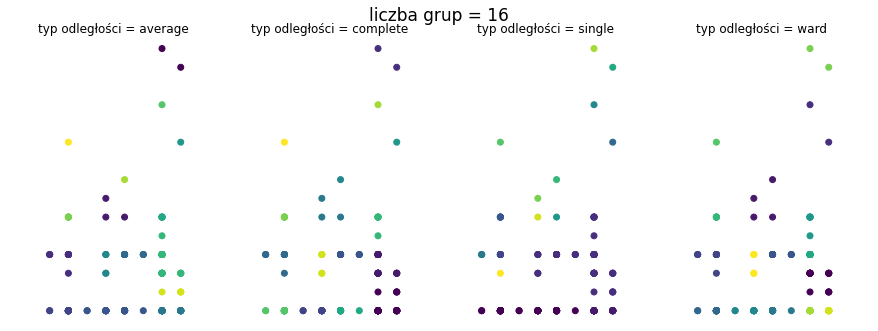

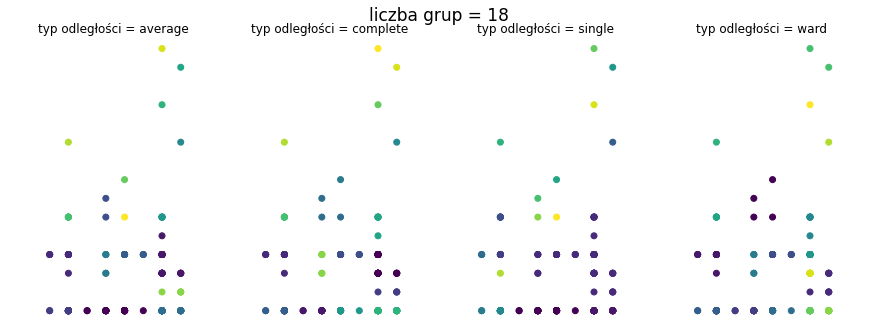

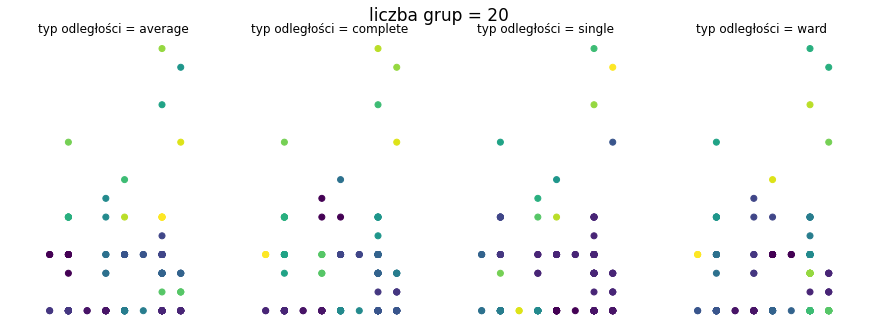

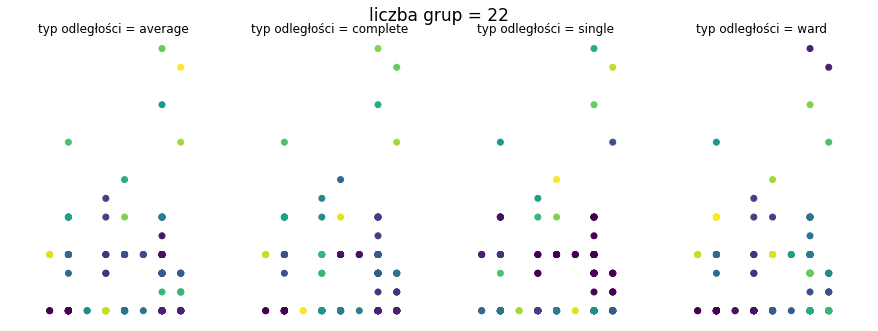

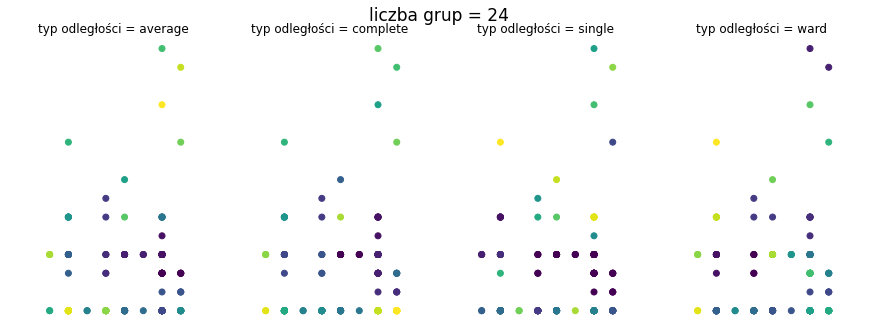

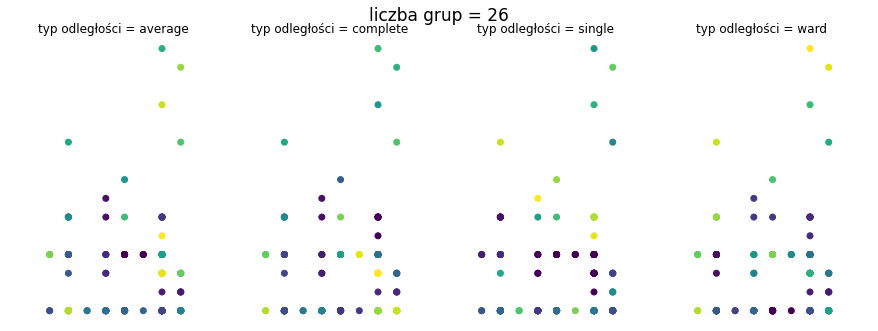

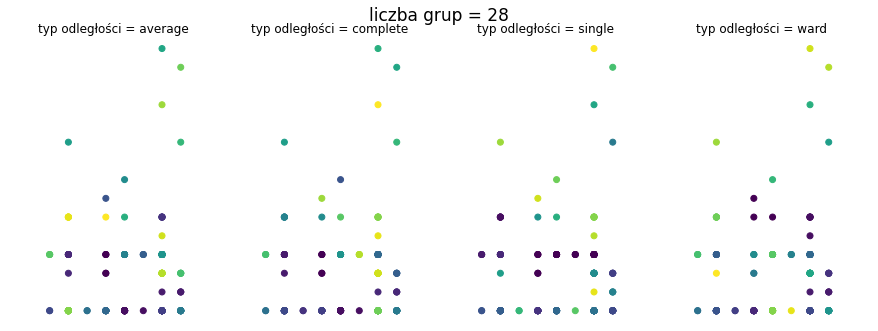

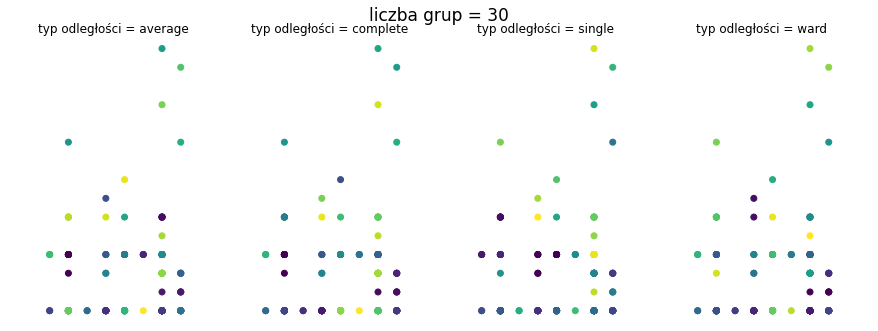

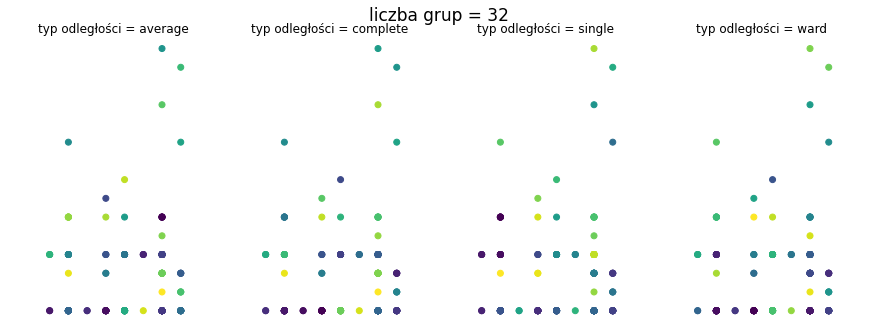

In [9]:
for ile_grup in (8,10,12,14,16,18,20,22,24,26,28,30,32):
    plt.figure(figsize=(12, 4.5))
    for index, typ_odleglosci in enumerate(('average', 'complete', 'single', 'ward')):
        
        plt.subplot(1, 4, index + 1)
        model = AgglomerativeClustering(linkage = typ_odleglosci, n_clusters = ile_grup)
        model.fit(df)
        plt.scatter(df.mainhue, df.stripes, c = model.labels_)
        plt.title('typ odległości = %s ' % typ_odleglosci, fontdict=dict(verticalalignment = 'top'))
        plt.axis('equal')
        plt.axis('off')
        plt.subplots_adjust(bottom = 0, top = .89, wspace = 0, left = 0, right = 1)
        plt.suptitle('liczba grup = %i' % ile_grup, size = 17)

**Wnioski dotyczące liczby grup dla różnych typów odległości:**
*  Wykresy potwierdziły naszą opinie, że dla single tworzone są przede wszystkim dwie grupy, w których liczebność znacząco wyróżnia się na tle innych ( zawierają o wiele więcej obiektów niż pozostałe).
* Między wykresami dla average, complete i ward istnieją jedynie drobne różnice, polegające na tym, że pewne obiekty są przypisywane do innych grup, jednak widzimy, że większość obiektów tworzy dla każdego sposobu podobne grupy ( właśnie z tymi drobnymi wyjątkami w postaci poszczególnych obiektów).
* Następujących wykresy pokazują, że wybrany przez nas sposób tworzy grupy z obiektów, które 'faktycznie' znajdują się blisko siebie. Nie mamy tutaj obiektów, które zostały przypisane do jakiejś grupy, mimo tego, że nie znajdują się w jej sąsiedztwie.
* Na wykresach możemy zobaczyć, jak rozmieszczone są grupy dla wybranej liczby grup, w tym najbardziej nas interesujące 22.
* Liczba 22 wydaje nam się optymalną wielkością grupy, ponieważ bardziej odległe elementy tworzą oddzielne elementy, ale wciąż część skupisk które znajdują się blisko siebie tworzą jedną grupę, dla większej ilości grup oczywiście powstaje coraz więcej pojedynczych grup, czego chcieliśmy uniknąć
* Widzimy, że dla zadanej liczby grup = 22, są skupiska obiektów, które są połączone w jedne grupy, jak i są skupiska obiektów, których odległość jest na tyle duże, że same tworzą osobną grupę.
* Wykresy udawadniają również, że ilość kombinacji naszych dwóch atrybutów wynosi 32.

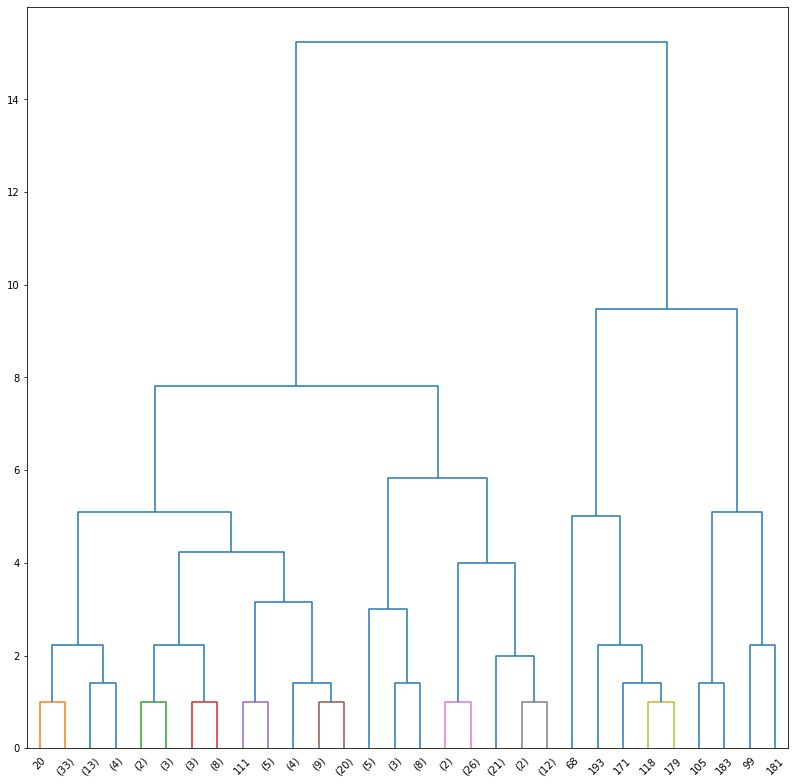

In [11]:
df = flags.drop(columns = ['landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'colours', 'red',
           'green', 'blue', 'gold', 'white', 'black', 'orange', 'circles', 'crosses', 'saltires', 'quarters',
           'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright'])

grupy = linkage(df, method = 'complete', metric = 'euclidean')
prog_proc = 7
prog = prog_proc*max(grupy[:,2])/100
plt.figure(figsize = (30,30))
plt.subplot(2,2,3)
cl = dendrogram(grupy, truncate_mode = 'lastp', color_threshold = prog )
df['grupa'] = fcluster(grupy, prog, criterion = 'distance')

**Poniżej możemy zobaczyć, jakie grupy zostały utworzone. W każdej grupie zawarta jest informacja o flagach krajów je tworzących ( nazwie, ilości poziomych liń jak i głównym kolorze):**

In [12]:
flagi = range(1,23)
for flaga in flagi:
    print(df[df['grupa'] == flaga])

                 stripes  mainhue  grupa
name                                    
Albania                0        7      1
Bahrain                0        7      1
Bermuda                0        7      1
Bhutan                 0        6      1
Burma                  0        7      1
Burundi                0        7      1
Canada                 0        7      1
China                  0        7      1
Congo                  0        7      1
Denmark                0        7      1
Kampuchea              0        7      1
Kiribati               0        7      1
Maldive-Islands        0        7      1
Malta                  0        7      1
Mongolia               0        7      1
Morocco                0        7      1
Norway                 0        7      1
Panama                 0        7      1
Peru                   0        7      1
Portugal               0        7      1
Romania                0        7      1
Rwanda                 0        7      1
Seychelles      

Text(0, 0.5, 'stripes')

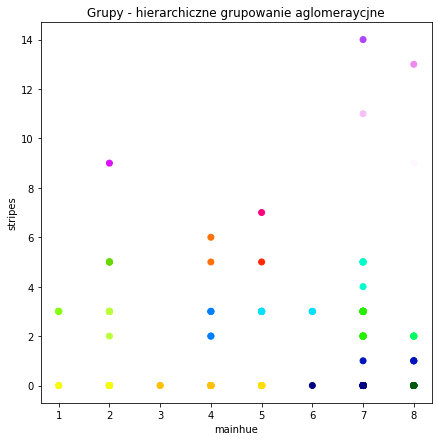

In [12]:
flags['group'] = df['grupa']

plt.figure(figsize = (7, 7))
plt.scatter(flags.mainhue, flags.stripes, c = flags.group, cmap = 'gist_ncar')
plt.title('Grupy - hierarchiczne grupowanie aglomeraycjne')
plt.xlabel('mainhue')
plt.ylabel('stripes')

## 3. Analiza grup wynikowych

**Analiza powiązań wyglądu flag z: położeniem geograficznym, religią, językiem.**

Text(0.5, 1.0, 'Macierz pomyłek dla kontynentu')

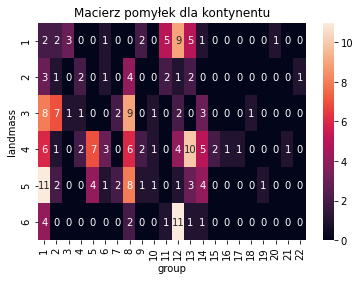

In [14]:
pomylki = pd.crosstab(flags['landmass'], flags['group'])
sns.heatmap(pomylki,annot = pomylki)
plt.title('Macierz pomyłek dla kontynentu')

**Wnioski dla macierzy pomyłek z kontynentami**
* Biorąc pod uwagę całą macierz można stwierdzić, że kontynent, na którym znajduje się kraj ma niewielki wpływ na jego flagę, jednakże dla niektórych grup widać duże skupisko na jednym kontynencie i niewielkie skupiska na pozostałych.

Text(0.5, 1.0, 'Macierz pomyłek dla strefy')

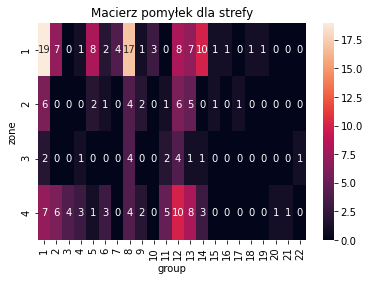

In [15]:
pomylki = pd.crosstab(flags['zone'], flags['group'])
sns.heatmap(pomylki,annot = pomylki)
plt.title('Macierz pomyłek dla strefy')

**Wnioski dla macierzy pomyłek dla strefy**
* Strefa, w której leży kraj, podobnie jak kontynent nie mają zbyt dużego wpływu na wygląd flagi. 

Text(0.5, 1.0, 'Macierz pomyłek dla języka')

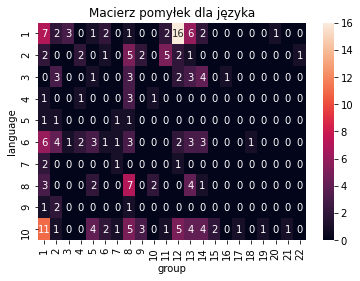

In [16]:
pomylki = pd.crosstab(flags['language'], flags['group'])
sns.heatmap(pomylki,annot = pomylki)
plt.title('Macierz pomyłek dla języka')

**Wnioski do macierzy pomyłek dla języka**
* Może to być przypadek, ale z analizy danych wynika, że język ma większy wpływ na wygląd flagi niż zarówno kontynent jak i strefa. 
* Jedynie dla atrybutu język o wartości 10 (języki oznaczone jako "inne") jest więcej pomyłek ze względu na większą różnorodność języków w tej kategorii.

Text(0.5, 1.0, 'Macierz pomyłek dla religii')

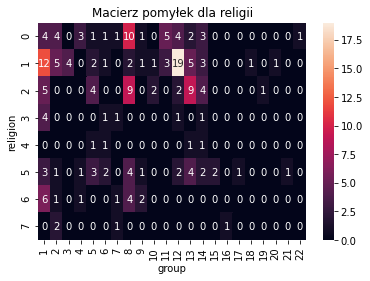

In [17]:
pomylki = pd.crosstab(flags['religion'], flags['group'])
sns.heatmap(pomylki,annot = pomylki)
plt.title('Macierz pomyłek dla religii')

**Wnioski do macierzy pomyłek dla religi**
* Religia posiada duży wpływ na wygląd flagi, co można zobaczyć po występowaniu niewielu skupisk obiektów(nawet jeżeli występują to jedno jest o wiele większe od pozostałych).

**Analiza pojedynczych atrybutow w zaleznosci od grupy**

In [20]:
groups = range(1,16) 
flags_slimmed = flags.drop(['red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'topleft', 'botright'], axis = 1)

for group_number in groups:
    frame_group = flags_slimmed[flags_slimmed['group'] == group_number]
    print("\n\nGroup number - ", group_number)
    print(frame_group.describe())



Group number -  1
        landmass       zone          area   population   language   religion  \
count  34.000000  34.000000     34.000000    34.000000  34.000000  34.000000   
mean    3.970588   1.911765   1440.147059    48.058824   6.264706   2.500000   
std     1.403141   1.215248   4362.969701   176.231931   3.518857   2.106987   
min     1.000000   1.000000      0.000000     0.000000   1.000000   0.000000   
25%     3.000000   1.000000      7.500000     0.250000   2.500000   1.000000   
50%     4.000000   1.000000     61.500000     4.500000   6.500000   2.000000   
75%     5.000000   2.750000    339.750000    19.500000  10.000000   4.500000   
max     6.000000   4.000000  22402.000000  1008.000000  10.000000   6.000000   

            bars  stripes    colours    mainhue  ...    crosses   saltires  \
count  34.000000     34.0  34.000000  34.000000  ...  34.000000  34.000000   
mean    0.470588      0.0   3.000000   6.970588  ...   0.205882   0.088235   
std     1.051270      0.0

       landmass      zone        area  population   language  religion  bars  \
count  6.000000  6.000000    6.000000    6.000000   6.000000  6.000000   6.0   
mean   3.333333  2.666667  196.833333   11.833333   5.000000  3.000000   0.0   
std    1.505545  1.505545  274.145521   19.291622   4.289522  2.097618   0.0   
min    1.000000  1.000000    2.000000    0.000000   1.000000  0.000000   0.0   
25%    2.500000  1.250000    9.250000    1.000000   1.250000  1.500000   0.0   
50%    4.000000  3.000000   36.500000    2.000000   4.000000  3.500000   0.0   
75%    4.000000  4.000000  401.250000   13.500000   9.000000  4.750000   0.0   
max    5.000000  4.000000  583.000000   49.000000  10.000000  5.000000   0.0   

        stripes   colours  mainhue  ...  crosses  saltires  quarters  \
count  6.000000  6.000000      6.0  ...      6.0       6.0       6.0   
mean   4.833333  3.666667      7.0  ...      0.0       0.0       0.0   
std    0.408248  0.516398      0.0  ...      0.0       0.0     

       landmass      zone         area  population   language  religion  bars  \
count  8.000000  8.000000     8.000000    8.000000   8.000000  8.000000   8.0   
mean   1.875000  3.500000   732.125000    8.500000   2.750000  0.375000   0.0   
std    1.726888  0.755929  1262.970471   12.188988   2.964071  0.517549   0.0   
min    1.000000  2.000000     0.000000    0.000000   1.000000  0.000000   0.0   
25%    1.000000  3.000000    20.500000    0.000000   1.750000  0.000000   0.0   
50%    1.000000  4.000000    67.500000    3.500000   2.000000  0.000000   0.0   
75%    2.000000  4.000000   790.250000   10.750000   2.000000  1.000000   0.0   
max    6.000000  4.000000  2777.000000   28.000000  10.000000  1.000000   0.0   

        stripes  colours  mainhue  ...  crosses  saltires  quarters  sunstars  \
count  8.000000  8.00000      8.0  ...      8.0       8.0       8.0  8.000000   
mean   2.875000  3.12500      2.0  ...      0.0       0.0       0.0  0.875000   
std    0.353553  2.03101   

**Wnioski**
* Grupa 3: 
    * zone     - 4 - wszystkie panstaw leza w tym samym kwadrancie
    * religion - 1 - ta sama religia dla wszystkich panstw
    
* Grupa 7:
    * zone    - 1 - wszystkie panstwa leza w tym samym kwadrancie
    * colours - 2 - kaza flaga ma dokladnie 2 kolory
    
* Grupa 10:
    * zone - 1 - wszystkie panstwa leza w tym samym kwadrancie
    
* Grupa 15:
    * landmass - 4 - wszystkie panstwa leza na tym kontynencie
    * religion - 5 - jedna religia dla calej grupy
    * language - 10 - wszystkie państwa przyjmują ten sam atrybut (10 - other)